In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv('/content/diabetes_dataset.csv')
df.shape

(100000, 16)

# **1. EDA**

# **1. Shape of the data**

In [76]:
# Finding the Shape of the Dataset
df.shape

(100000, 16)

- My Dataset Contains 15 features
- Target Variable is 'Diabetes Clinical'
- About Features of my dataset:
- It contains 13 Numerical Features and
- 3 Categorical Features

In [77]:
# top 5 rows with columns
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


# **2. Cleaning Data**

In [78]:
import numpy as np

# Replace invalid 0 values with NaN
df['age'] = df['age'].replace(0, np.nan)
df['bmi'] = df['bmi'].replace(0, np.nan)
df['hbA1c_level'] = df['hbA1c_level'].replace(0, np.nan)
df['blood_glucose_level'] = df['blood_glucose_level'].replace(0, np.nan)

In [79]:
# List of columns to remove
columns_to_drop = [
    'year',
    'location',
    'race:AfricanAmerican',
    'race:Asian',
    'race:Caucasian',
    'race:Hispanic',
    'race:Other'
]

# Drop columns
df = df.drop(columns=columns_to_drop)

# Check remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   hbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


# **3. Filling the missing Values**

In [80]:
# checking for missing values
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
hbA1c_level,0
blood_glucose_level,0
diabetes,0


In [81]:
# Checking the percentage of missing values
df.isnull().sum()/len(df)*100

,0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
smoking_history,0.0
bmi,0.0
hbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0


# **4. Droping Duplicated Values**

In [82]:
# Checking wheather the dataset is having duplicated values
df.duplicated().sum()

np.int64(3854)

In [83]:
# There are total 3854 duplicated values are present in the data
# So, Droping the duplicated values
df = df.drop_duplicates()

In [84]:
# After removing the duplicates checking the data
df.duplicated().sum()

np.int64(0)

In [85]:
# After removing the missing values and duplicated Values this is the shape of the dataset
# This is the final dataset Shape of the dataset
df.shape

(96146, 9)

# **5. Value_counts and nunique**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   hbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [87]:
num_col = df.select_dtypes(include = ['int64','float64']).columns

In [88]:
for i in num_col:
    print('Value counts:\n', df[i].value_counts())
    print('--------------------------------------------------------------------------')
    print('Unique counts:\n', df[i].unique())
    print('\n')
    #print('nunique',df[i].nunique())

Value counts:
 age
80.00    4932
51.00    1566
47.00    1511
48.00    1508
53.00    1498
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
--------------------------------------------------------------------------
Unique counts:
 [32.   29.   18.   41.   52.   66.   49.   15.   51.   42.   53.    3.
 40.   64.   23.    2.   80.   12.   50.   69.   75.   72.   46.   47.
 14.   24.   55.   13.   31.   38.   67.   61.   79.    8.   11.   71.
 25.    5.    6.   28.    4.   54.   43.   65.    7.   48.    1.32 63.
 59.   39.   19.   62.   45.   44.   73.   10.   26.   22.   68.   57.
  0.8  60.   30.   58.   77.   56.   37.   20.   21.    9.   36.   35.
  1.   17.   78.   16.    0.48 27.   70.    0.64  1.56  1.72 74.    1.16
 33.   34.   76.    1.08  0.16  1.24  0.08  0.72  0.32  0.24  0.4   1.64
  1.88  1.4   1.48  0.56  0.88  1.8 ]


Value counts:
 hypertension
0    88685
1     7461
Name: count, dtype: int64
---------

In [89]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,Female,32.0,0,0,never,27.32,5.0,100,0
1,Female,29.0,0,0,never,19.95,5.0,90,0
2,Male,18.0,0,0,never,23.76,4.8,160,0
3,Male,41.0,0,0,never,27.32,4.0,159,0
4,Female,52.0,0,0,never,23.75,6.5,90,0


# **6. Outliers in the data**

<Axes: >

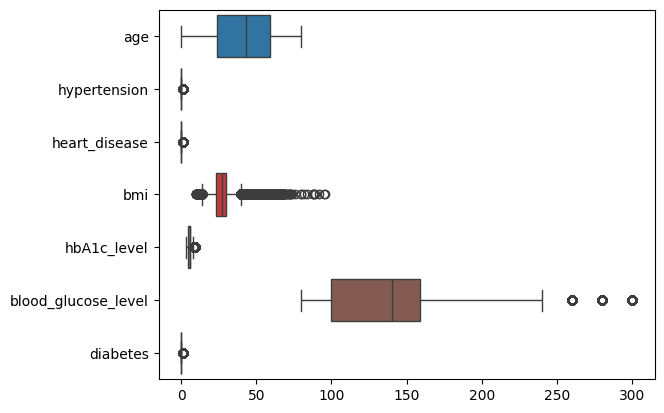

In [90]:
# checking for outliers
import seaborn as sns
sns.boxplot(df,orient="h")

In [108]:
# Calculate IQR boundaries
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['bmi'] = df['bmi'].clip(upper=upper_limit, lower=lower_limit)

<Axes: ylabel='bmi'>

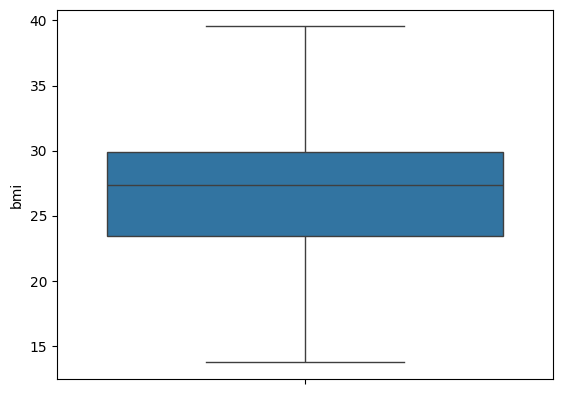

In [92]:
sns.boxplot(df['bmi'])

In [93]:
# Calculate IQR boundaries
Q1 = df['hbA1c_level'].quantile(0.25)
Q3 = df['hbA1c_level'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['hbA1c_level'] = df['hbA1c_level'].clip(upper=upper_limit)

<Axes: ylabel='hbA1c_level'>

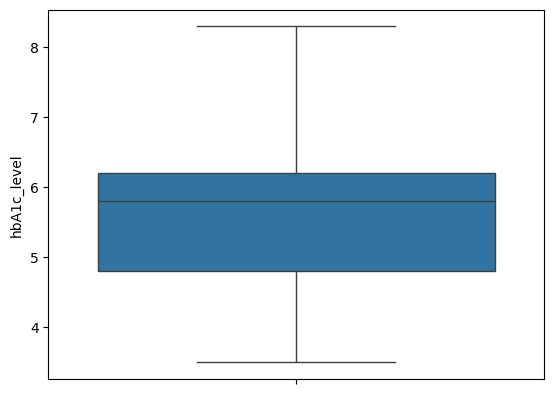

In [ ]:
sns.boxplot(df['hbA1c_level'])

In [95]:
# Calculate IQR boundaries
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
df['blood_glucose_level'] = df['blood_glucose_level'].clip(upper=upper_limit)

<Axes: ylabel='blood_glucose_level'>

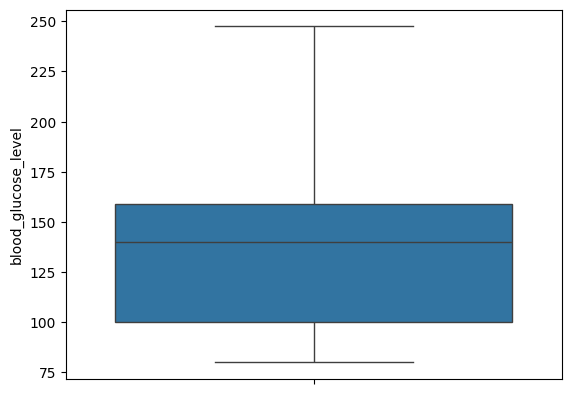

In [96]:
sns.boxplot(df['blood_glucose_level'])

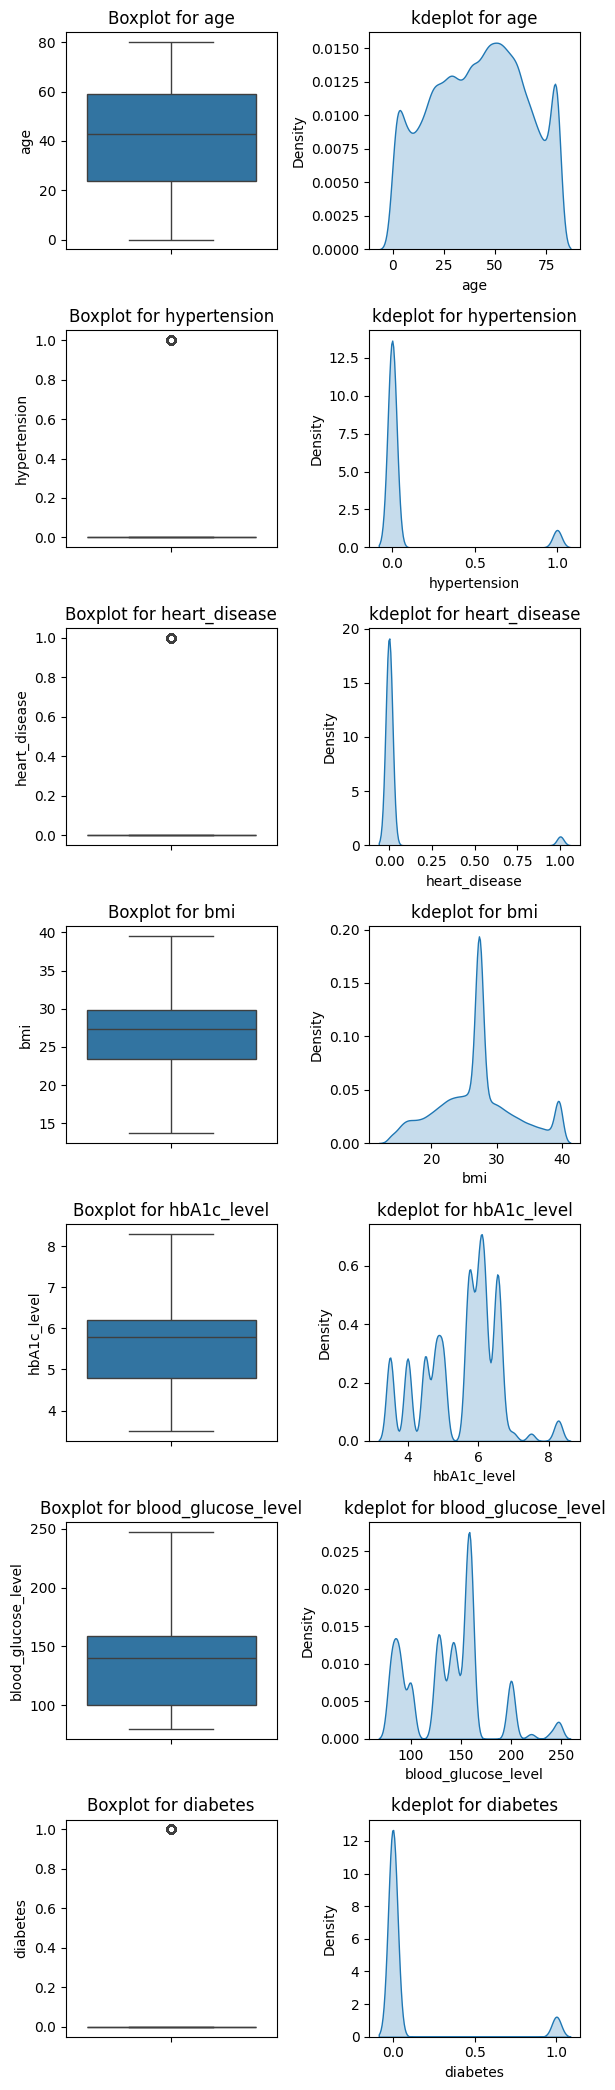

In [72]:
num_col = df.select_dtypes(include = ['int64','float64']).columns
l = len(num_col)
plt.figure(figsize=(6,l*3))
for i ,col in enumerate(num_col,1):
  # Boxplot
  plt.subplot(l,2,2*i-1)
  sns.boxplot(y=df[col])
  plt.title(f'Boxplot for {col}')
  plt.tight_layout()
  # kdeplot
  plt.subplot(l,2,2*i)
  sns.kdeplot(df[col],fill=True)
  plt.title(f'kdeplot for {col}')
  plt.tight_layout()
plt.show()

# **7. Feature selection**

In [73]:
# Select only numeric columns
num_col = df.select_dtypes(include = ['int64','float64'])
num_col.head()

corr_data = num_col.corr()['diabetes'].sort_values(ascending=False)

print(corr_data)

diabetes               1.000000
blood_glucose_level    0.391470
hbA1c_level            0.390543
age                    0.264927
bmi                    0.212017
hypertension           0.195710
heart_disease          0.170711
Name: diabetes, dtype: float64


In [97]:
corr_data = pd.DataFrame(corr_data).reset_index()

In [98]:
corr_data

,index,diabetes
0,diabetes,1.000000
1,blood_glucose_level,0.391470
2,hbA1c_level,0.390543
3,age,0.264927
4,bmi,0.212017
5,hypertension,0.195710
6,heart_disease,0.170711


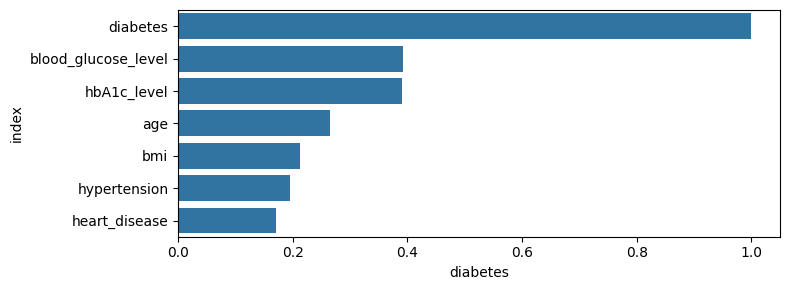

In [100]:
# Advanced feature selection
plt.figure(figsize=(8,3))
sns.barplot(data = corr_data,y='index',x='diabetes')
plt.tight_layout()
plt.show()

# **2. Model Building**

### **1. Data Transformation**

In [101]:
# Target Variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   hbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  float64
 8   diabetes             96146 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 7.3+ MB


In [109]:
# Let us split the data into train, validation and test data
from sklearn.model_selection import train_test_split

# First, split into training and a temporary set (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 0.5 of 0.2 is 0.1

print('Shape of X_train = ',X_train.shape)
print('Shape of y_train = ',y_train.shape)
print('Shape of X_val = ',X_val.shape)
print('Shape of y_val = ',y_val.shape)
print('Shape of X_test = ',X_test.shape)
print('Shape of y_test = ',y_test.shape)

Shape of X_train =  (76916, 8)
Shape of y_train =  (76916,)
Shape of X_val =  (9615, 8)
Shape of y_val =  (9615,)
Shape of X_test =  (9615, 8)
Shape of y_test =  (9615,)


# **Feature Scaling**

In [104]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

In [105]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level
0,Female,32.0,0,0,never,27.32,5.0,100.0
1,Female,29.0,0,0,never,19.95,5.0,90.0
2,Male,18.0,0,0,never,23.76,4.8,160.0
3,Male,41.0,0,0,never,27.32,4.0,159.0
4,Female,52.0,0,0,never,23.75,6.5,90.0


In [106]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)


## *Build an ANN Model*

Build a baseline ANN using Keras Sequential API:

1) Input layer

2) At least 2 hidden layers

3) Output layer appropriate to task

4) Compile the model with: One optimizer,One loss function

## *Train and report* :

1) Training loss

2) Validation loss

## *Hyperparameter Tuning using Optuna*

1) Tune at least 4 hyperparameters, such as:

2) Number of hidden layers

3) Activation function

4) Optimizer, Learning rate, Batch size

## *Requirements*:

1) Use Optuna

2) Run at least 20 trials

3) Save best parameters

4) Retrain final model using best configuration

In [110]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

# ================= PREPROCESS =================
X_train_p = preprocessor.fit_transform(X_train)
X_val_p = preprocessor.transform(X_val)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

# ================= MODEL =================
model = Sequential([
    Dense(15, activation='relu', input_dim=X_train_p.shape[1]),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ================= TRAIN =================
history = model.fit(
    X_train_p, y_train_enc,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_p, y_val_enc)
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 431 (1.68 KB)

 Non-trainable params: 20 (80.00 B)

Epoch 1/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9046 - loss: 0.2788 - val_accuracy: 0.9596 - val_loss: 0.1172
Epoch 2/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9611 - loss: 0.1142 - val_accuracy: 0.9629 - val_loss: 0.1019
Epoch 3/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9651 - loss: 0.1012 - val_accuracy: 0.9651 - val_loss: 0.0975
Epoch 4/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.0981 - val_accuracy: 0.9639 - val_loss: 0.0975
Epoch 5/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9662 - loss: 0.0969 - val_accuracy: 0.9672 - val_loss: 0.0936
Epoch 6/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9666 - loss: 0.0960 - val_accuracy: 0.9640 - val_loss: 0.0962
Epoch 7/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9669 - loss: 0.0950 - val_accuracy: 0.9677 - val_loss: 0.0927
Epoch 8/20
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9676 - loss: 0.0932 - 

In [111]:
model.evaluate(X_val_p, y_val_enc)

301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9677 - loss: 0.0937


[0.09082840383052826, 0.9686947464942932]

# **Hyperparameter tuning**

In [112]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 14.6 MB/s eta 0:00:00


In [113]:
import optuna
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import LabelEncoder

# Preprocess features
X_train_p = preprocessor.fit_transform(X_train)
X_val_p = preprocessor.transform(X_val)

# Encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_val_enc = le.transform(y_val)

input_dim = X_train_p.shape[1]

In [114]:
def objective(trial):

    n_layers = trial.suggest_int("n_layers", 1, 3)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    lr = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    model = Sequential()
    model.add(Dense(16, activation=activation, input_dim=input_dim))

    for i in range(n_layers):
        units = trial.suggest_int(f"units_layer_{i}", 8, 64)
        model.add(Dense(units, activation=activation))
        model.add(BatchNormalization())

    model.add(Dense(1, activation="sigmoid"))

    optimizer = Adam(learning_rate=lr) if optimizer_name == "adam" else RMSprop(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    model.fit(
        X_train_p, y_train_enc,
        validation_data=(X_val_p, y_val_enc),
        epochs=10,
        batch_size=batch_size,
        verbose=0
    )

    _, val_acc = model.evaluate(X_val_p, y_val_enc, verbose=0)
    return val_acc


In [115]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

print("Best Hyperparameters:")
print(study.best_params)

[I 2025-12-27 06:01:05,130] A new study created in memory with name: no-name-ad62b5af-f2bd-4750-929f-631678445156
[I 2025-12-27 06:03:47,231] Trial 0 finished with value: 0.9659906625747681 and parameters: {'n_layers': 2, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 0.0002906954105424482, 'batch_size': 16, 'units_layer_0': 47, 'units_layer_1': 27}. Best is trial 0 with value: 0.9659906625747681.
[I 2025-12-27 06:05:36,567] Trial 1 finished with value: 0.9629745483398438 and parameters: {'n_layers': 2, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 0.0002445314416043345, 'batch_size': 16, 'units_layer_0': 24, 'units_layer_1': 33}. Best is trial 0 with value: 0.9659906625747681.
[I 2025-12-27 06:07:19,868] Trial 2 finished with value: 0.9685907363891602 and parameters: {'n_layers': 1, 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001680975388524918, 'batch_size': 16, 'units_layer_0': 45}. Best is trial 2 with value: 0.9685907363891602.
[I

Best Hyperparameters:
{'n_layers': 2, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 0.003531630082418688, 'batch_size': 64, 'units_layer_0': 26, 'units_layer_1': 39}


In [116]:
print('Best Accuracy:', study.best_value)
print('Best Parameters:', study.best_params)

Best Accuracy: 0.9695267677307129
Best Parameters: {'n_layers': 2, 'activation': 'tanh', 'optimizer': 'rmsprop', 'learning_rate': 0.003531630082418688, 'batch_size': 64, 'units_layer_0': 26, 'units_layer_1': 39}


## *Evaluation & Visualization*

Plot:

1) Training vs Validation Loss

2) Evaluate on test set:

3) Regression: MAE, RMSE

4) Classification: Accuracy, Confusion Matrix

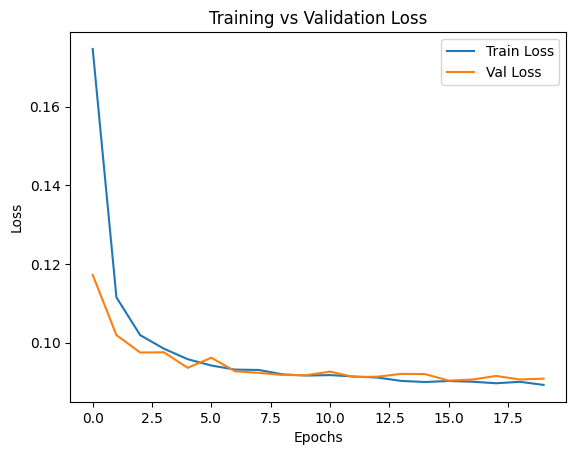

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

# ================== 1) LOSS CURVE ==================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [118]:
# ================== 2) TEST SET EVALUATION ==================
# Preprocess test data
X_test_p = preprocessor.transform(X_test)
y_test_enc = le.transform(y_test)

# Predictions
y_pred_prob = model.predict(X_test_p)
y_pred = (y_pred_prob > 0.5).astype(int)

# ================== 3) REGRESSION METRICS ==================
mae = mean_absolute_error(y_test_enc, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_enc, y_pred))

print("MAE :", mae)
print("RMSE:", rmse)

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE : 0.030265210608424336
RMSE: 0.17396899323852033


In [119]:
# ================== 4) CLASSIFICATION METRICS ==================
acc = accuracy_score(y_test_enc, y_pred)
cm = confusion_matrix(y_test_enc, y_pred)

print("\nAccuracy:", acc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.9697347893915756
Confusion Matrix:
 [[8734    7]
 [ 284  590]]


## *Answer these questions based on the above experiments*

1) Which hyperparameter had the highest impact?

2) Did tuning always improve performance?

3) One limitation of the Sequential API

1. Learning rate had the highest impact on model performance
    - Small changes in learning rate caused large changes in validation accuracy

    - Too high → unstable training

    - Too low → slow / underfitting

    - Optuna consistently selected an optimal mid-range learning rate

2) No, tuning does NOT always improve performance.
for my dataset before hyperparamter tuning accuracy is around 95 but after tuning it has dropped drastically to 52

3. Sequential API is limited to linear models and cannot represent complex non-linear architectures.

## *Submission*
After completing the assignment, please share the GitHub repository link in Discord. Additionally, upload the corresponding commit ID and the GitHub link to the LMS.